# ITBA 82.05 - Análisis Predictivo - Kaggle Challenge : Submission of a predictive model - Thomas SIMON 

## Introduction

This project is part of ITBA's 82.05 - Análisis Predictivo course for the 2023 academic year. It corresponds to the second exam of this course and aims to assess the ability to understand and analyze a dataset and to set up different models in order to best predict a given variable to be explained from this dataset. Two datasets are available: a first containing the variable to be explained and a second similar to the first but not containing it. The aim of this work is to obtain an output prediction of the variable to be explained for the second dataset, which will then be compared with the actual results and from which an R-squared statistic will be calculated. The aim is to obtain the highest possible R-squared.

After importing the packages needed for this work, the data will be processed to obtain a cleaned dataset that can be easily manipulated by prediction models (execution time will be taken into account). 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.model_selection import RandomizedSearchCV,train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import (
    f1_score, accuracy_score, precision_score, confusion_matrix, 
    classification_report, make_scorer, ConfusionMatrixDisplay, 
)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import category_encoders as ce

## Data visualization and cleaning

The first thing to do is to load and visualize the proposed data. To do this, two dataframes are created: a first dataframe "origen.csv" corresponding to the dataset containing the variable to be explained, and a second "testear.csv" corresponding to the dataset not containing it. These two datasets are reused and keep the same name. The first step is to visualize the data.

In [4]:
origen = pd.read_csv('/Users/thomassim0n/Desktop/INSA SCIENCES-PO/Mobilité/Cours/Analysis Pred/Kaggle/origen.csv')
testear = pd.read_csv('/Users/thomassim0n/Desktop/INSA SCIENCES-PO/Mobilité/Cours/Analysis Pred/Kaggle/testear.csv')

In [5]:
origen.head()

,Unnamed: 0,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,...,genres_y,original_language,popularity,production_companies,production_countries,revenue,runtime,status,tagline,video
0,0,4.4,15,movie,0.0,1951,0,91,"Comedy,Musical",nm0883334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,7.0,990,tvSeries,0.0,2007,2021,30,"Action,Adventure,Animation","nm2291816,nm3088555,nm4930005,nm1746040",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,8.1,41,tvEpisode,0.0,2011,0,44,"Documentary,History,War",nm0414025,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,4.6,48,movie,0.0,1969,0,84,Drama,nm2977268,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,5.6,28,movie,0.0,2010,0,130,"Comedy,Drama",nm2366663,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
testear.head()

,Unnamed: 0,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,writers,...,genres_y,original_language,popularity,production_companies,production_countries,revenue,runtime,status,tagline,video
0,0,10,tvEpisode,0.0,1980,0,0,"Drama,Family,Fantasy",0,nm0416721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,17,tvEpisode,0.0,2014,0,0,"Drama,War",nm1573573,"nm0208548,nm2952524,nm0429741,nm0894424",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,7,tvEpisode,0.0,2004,0,0,Music,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,297,tvEpisode,0.0,2002,0,30,Comedy,nm0952360,"nm0742814,nm0804887,nm0005380",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,10,tvEpisode,0.0,2016,0,23,"Animation,Comedy,Crime",nm2268014,nm1138389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
origen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 977541 entries, 0 to 977540
Data columns (total 29 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            977541 non-null  int64  
 1   averageRating         977541 non-null  float64
 2   numVotes              977541 non-null  int64  
 3   titleType             977541 non-null  object 
 4   isAdult               977541 non-null  float64
 5   startYear             977541 non-null  int64  
 6   endYear               977541 non-null  int64  
 7   runtimeMinutes        977541 non-null  int64  
 8   genres_x              977539 non-null  object 
 9   directors             977541 non-null  object 
 10  writers               977541 non-null  object 
 11  seasonNumber          438243 non-null  float64
 12  episodeNumber         438243 non-null  float64
 13  ordering              370623 non-null  float64
 14  language              370623 non-null  object 
 15  

In [8]:
testear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244386 entries, 0 to 244385
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            244386 non-null  int64  
 1   numVotes              244386 non-null  int64  
 2   titleType             244386 non-null  object 
 3   isAdult               244386 non-null  float64
 4   startYear             244386 non-null  int64  
 5   endYear               244386 non-null  int64  
 6   runtimeMinutes        244386 non-null  int64  
 7   genres_x              244386 non-null  object 
 8   directors             244386 non-null  object 
 9   writers               244386 non-null  object 
 10  seasonNumber          109388 non-null  float64
 11  episodeNumber         109388 non-null  float64
 12  ordering              92817 non-null   float64
 13  language              92817 non-null   object 
 14  attributes            92817 non-null   object 
 15  

In [9]:
origen.describe()

,Unnamed: 0,averageRating,numVotes,isAdult,startYear,endYear,runtimeMinutes,seasonNumber,episodeNumber,ordering,isOriginalTitle,budget,popularity,revenue,runtime
count,977541.000000,977541.000000,9.775410e+05,977541.000000,977541.000000,977541.000000,977541.000000,438243.000000,438243.000000,370623.000000,370623.000000,4.737000e+04,47369.000000,4.736900e+04,47158.000000
mean,488770.000000,6.881764,1.625621e+03,0.023017,1999.356151,58.196713,41.363622,4.061229,55.341327,3.479414,0.000019,6.180242e+06,3.433752,1.843587e+07,94.437508
std,282191.924082,1.405315,2.509798e+04,2.888235,34.362292,336.455028,57.788808,12.336583,585.538414,5.148422,0.004346,2.309356e+07,7.120486,9.294434e+07,36.021579
min,0.000000,1.000000,5.000000e+00,0.000000,0.000000,0.000000,-22336.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,244385.000000,6.100000,9.000000e+00,0.000000,1992.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000e+00,0.442903,0.000000e+00,85.000000
50%,488770.000000,7.100000,2.200000e+01,0.000000,2008.000000,0.000000,27.000000,2.000000,8.000000,2.000000,0.000000,0.000000e+00,1.282498,0.000000e+00,95.000000
75%,733155.000000,7.900000,9.300000e+01,0.000000,2015.000000,0.000000,73.000000,4.000000,16.000000,3.000000,0.000000,0.000000e+00,4.665202,0.000000e+00,106.000000
max,977540.000000,10.000000,2.425542e+06,2020.000000,2021.000000,2022.000000,13319.000000,2012.000000,15762.000000,162.000000,1.000000,3.800000e+08,547.488298,2.787965e+09,1256.000000


In [10]:
testear.describe()

,Unnamed: 0,numVotes,isAdult,startYear,endYear,runtimeMinutes,seasonNumber,episodeNumber,ordering,isOriginalTitle,budget,popularity,revenue,runtime
count,244386.000000,2.443860e+05,244386.000000,244386.000000,244386.000000,244386.000000,109388.000000,109388.000000,92817.000000,92817.000000,1.177700e+04,11775.000000,1.177500e+04,11729.000000
mean,122192.500000,1.608292e+03,0.018659,1999.522039,58.347295,41.521470,3.976122,52.941502,3.487863,0.000011,6.674685e+06,3.518054,2.065998e+07,95.283656
std,70548.305781,2.336788e+04,0.135318,30.137175,336.881028,82.645724,5.978550,553.466598,5.143494,0.003282,2.434012e+07,8.515654,9.804592e+07,38.285468
min,0.000000,5.000000e+00,0.000000,0.000000,0.000000,-29745.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,61096.250000,9.000000e+00,0.000000,1992.000000,0.000000,0.000000,1.000000,4.000000,1.000000,0.000000,0.000000e+00,0.441267,0.000000e+00,85.000000
50%,122192.500000,2.200000e+01,0.000000,2008.000000,0.000000,27.000000,2.000000,8.000000,2.000000,0.000000,0.000000e+00,1.311197,0.000000e+00,95.000000
75%,183288.750000,9.100000e+01,0.000000,2015.000000,0.000000,74.000000,4.000000,16.000000,3.000000,0.000000,0.000000e+00,4.777108,0.000000e+00,107.000000
max,244385.000000,2.381831e+06,1.000000,2021.000000,2022.000000,14400.000000,135.000000,15108.000000,150.000000,1.000000,3.800000e+08,547.488298,1.845034e+09,1140.000000


First, the .describe() function indicates the presence of outliers on certain variables. Secondly, the data is incomplete, and the dataset suffers from a significant lack of filling. In order to optimize modeling and prediction, this NA problem needs to be resolved. What's more, there are both quantitative and categorical variables, so we'll need to make a prediction that takes this specificity into account, ensuring that the model correctly considers the types of variables. This will also need to be taken care of.  

First we can delete the index line, as it won't be useful for predictions.

In [11]:
origen = origen.drop(columns=['Unnamed: 0']) 
testear = testear.drop(columns=['Unnamed: 0']) 

Some occurrences of the variable 'isAdult' are not between 0 and 1 (whereas 'isAdult' is supposed to be a Boolean). These few occurrences are therefore removed. The same operation could be performed for the 'isOriginalTitle' variable, but no such anomalies are found either in the 'origen' dataset or in 'testear'.

In [12]:
print(origen['isAdult'].value_counts())

0.0       959073
1.0        18466
2014.0         1
2020.0         1
Name: isAdult, dtype: int64


In [13]:
origen = origen[(origen['isAdult'] == 0) | (origen['isAdult'] == 1)]
testear = testear[(testear['isAdult'] == 0) | (testear['isAdult'] == 1)]
print(origen['isAdult'].value_counts())

0.0    959073
1.0     18466
Name: isAdult, dtype: int64


### Missing values

Moreover, we need to analyze the missing values (the so-called NA) in our datasets. How many are there?

In [14]:
print("Origen : \n",origen.isna().sum(),"\n")
print("Testear : \n",testear.isna().sum())

Origen : 
 averageRating                0
numVotes                     0
titleType                    0
isAdult                      0
startYear                    0
endYear                      0
runtimeMinutes               0
genres_x                     0
directors                    0
writers                      0
seasonNumber            539298
episodeNumber           539298
ordering                606916
language                606916
attributes              606916
isOriginalTitle         606916
adult                   930169
budget                  930169
genres_y                930169
original_language       930181
popularity              930170
production_companies    930170
production_countries    930170
revenue                 930170
runtime                 930381
status                  930240
tagline                 953694
video                   930170
dtype: int64 

Testear : 
 numVotes                     0
titleType                    0
isAdult                      0
s

We only have 2 rows with NA in 'genre_x': we can delete them without consequence. For the rest of the columns, let's visualize the distribution of NA.

In [15]:
origen = origen.dropna(subset=['genres_x'])
testear= testear.dropna(subset=['genres_x'])

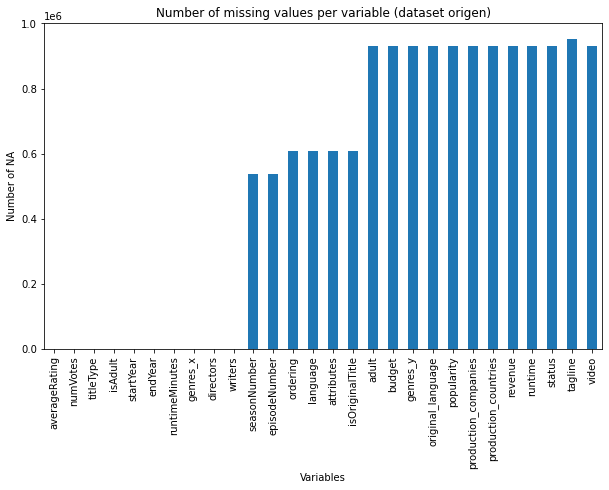

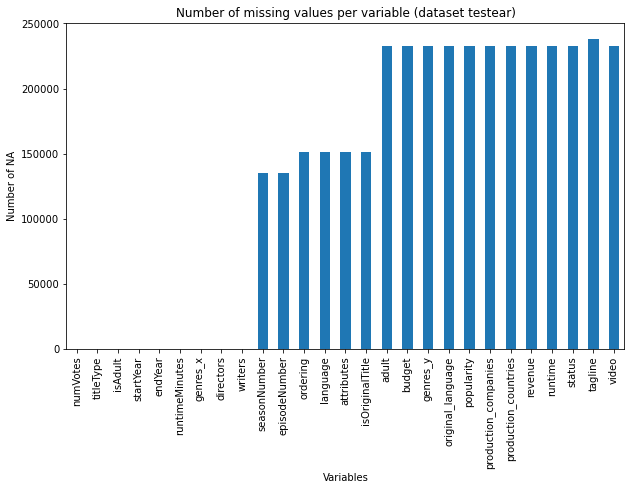

In [16]:
na_counts = origen.isnull().sum()

# Vizualizing the NA of the variables
plt.figure(figsize=(10, 6))
na_counts.plot(kind='bar')
plt.title('Number of missing values per variable (dataset origen)')
plt.xlabel('Variables')
plt.ylabel('Number of NA')
plt.show()

na_counts_testear = testear.isnull().sum()

# Vizualizing the NA of the variables
plt.figure(figsize=(10, 6))
na_counts_testear.plot(kind='bar')
plt.title('Number of missing values per variable (dataset testear)')
plt.xlabel('Variables')
plt.ylabel('Number of NA')
plt.show()

The first observation we can make is that our two datasets contain a large number of missing values in proportion to their size, which means we need to clean up a lot in order to manipulate the data. The second observation is that the NAs of the two datasets ('origen' and 'testear') are very similar in terms of the proportion of the number of NAs. This means that rather than treating the two datasets separately in terms of columns, we can apply a method to the first dataset and then pass it on to the second.

Here we have 4 options to clean the NA problem : 
- Deletion of NA rows or colomns
- Imputation of missing values: choose default values 0 and 1 or use other criteria such as median or mean
- Create a separate NA category
- Use advanced methods

The first thing to do is to observe the correlation between variables. In fact, if certain variables containing a lot of NA are highly correlated with other variables, we can remove these variables with little impact on the final model. To do this, we display the correlation matrix (this only applies to numerical variables). 

In [17]:
correlation_matrix = origen.corr()
#correlation_matrix2 = testear.corr()

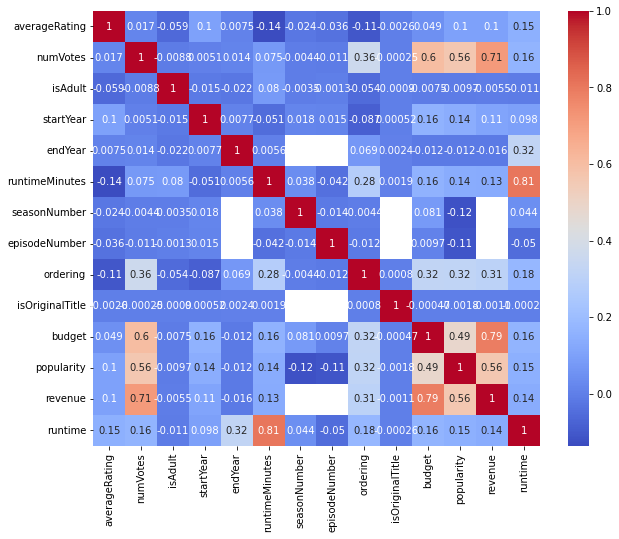

In [18]:
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

#plt.figure(figsize=(10, 8))
#heatmap = sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
#plt.show()

In [19]:
# Filter the correlation matrix for values above 0.7
high_correlation = correlation_matrix[abs(correlation_matrix) > 0.6]
#high_correlation2 = correlation_matrix2[abs(correlation_matrix2) > 0.6]

# Ignore the diagonal and identical values (upper part of the matrix)
high_correlation = high_correlation[high_correlation != 1]
#high_correlation2 = high_correlation2[high_correlation2 != 1]

# Display pairs of correlated variables
variable_pairs = high_correlation.stack().reset_index()
variable_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']
strong_correlation = variable_pairs.dropna()
#variable_pairs2 = high_correlation2.stack().reset_index()
#variable_pairs2.columns = ['Variable 1', 'Variable 2', 'Correlation']
#strong_correlation2 = variable_pairs2.dropna()

correlated_variables = strong_correlation['Variable 1']
#correlated_variables2 = strong_correlation2['Variable 1']

print(strong_correlation)

       Variable 1      Variable 2  Correlation
0        numVotes          budget     0.600867
1        numVotes         revenue     0.713653
2  runtimeMinutes         runtime     0.808981
3          budget        numVotes     0.600867
4          budget         revenue     0.788960
5         revenue        numVotes     0.713653
6         revenue          budget     0.788960
7         runtime  runtimeMinutes     0.808981


In [20]:
for i in correlated_variables : 
    print("Missing ", i, " : ",origen[i].isnull().sum())

Missing  numVotes  :  0
Missing  numVotes  :  0
Missing  runtimeMinutes  :  0
Missing  budget  :  930169
Missing  budget  :  930169
Missing  revenue  :  930170
Missing  revenue  :  930170
Missing  runtime  :  930381


We end by deleting columns with more than 75% NA correlated with other columns.

In [21]:
missing_percent = (origen[correlated_variables].isna().sum() / len(origen)) * 100

columns_to_drop = missing_percent[missing_percent > 75].index

origen = origen.drop(columns=columns_to_drop)

In [22]:
print(origen.columns,len(origen.columns))

Index(['averageRating', 'numVotes', 'titleType', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres_x', 'directors', 'writers',
       'seasonNumber', 'episodeNumber', 'ordering', 'language', 'attributes',
       'isOriginalTitle', 'adult', 'genres_y', 'original_language',
       'popularity', 'production_companies', 'production_countries', 'status',
       'tagline', 'video'],
      dtype='object') 25


In [23]:
deleted_colomns = [col for col in testear.columns if col not in origen.columns]
testear.drop(columns=deleted_colomns, inplace=True)
print(testear.columns,len(testear.columns))

Index(['numVotes', 'titleType', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres_x', 'directors', 'writers', 'seasonNumber',
       'episodeNumber', 'ordering', 'language', 'attributes',
       'isOriginalTitle', 'adult', 'genres_y', 'original_language',
       'popularity', 'production_companies', 'production_countries', 'status',
       'tagline', 'video'],
      dtype='object') 24


Now that we've done that, let's work on the content type. We can see that there are a number of occurrences of the variable 'typeTitle'.

In [24]:
unique_value = origen['titleType'].unique()
print(unique_value)

['movie' 'tvSeries' 'tvEpisode' 'short' 'video' 'tvSpecial' 'tvMovie'
 'tvMiniSeries' 'videoGame' 'tvShort']


In [25]:
print(origen[['episodeNumber','seasonNumber']].isna().sum())
print(testear[['episodeNumber','seasonNumber']].isna().sum())

episodeNumber    539298
seasonNumber     539298
dtype: int64
episodeNumber    134998
seasonNumber     134998
dtype: int64


We can consider that if we don't have the season number or episode number, then for the categories 'movie', 'video', 'tvSpecial', 'tvMovie' and 'videoGame' we have 0 season and 1 episode, then for the categories 'tvSeries', 'tvEpisode', 'short', 'tvMiniSeries' and 'tvShort',  we put 1 season and the median of the number of episodes where we have only one season in the dataset.

In [26]:
# We compute the median of 'episodeNumber' when 'seasonNumber' is equal to 1
oneseason_ep=origen[origen['seasonNumber']==1]
median_ep=oneseason_ep["episodeNumber"].dropna().median()
print("origen : ",median_ep)

oneseason_ep_test=testear[testear['seasonNumber']==1]
median_ep_test=oneseason_ep_test["episodeNumber"].dropna().median()
print("testear : ",median_ep_test)

origen :  7.0
testear :  7.0


In [27]:
# Fonction to replace Na in episodeNumber and seasonNumber
def replace_na_episode(row):
    if pd.isna(row['episodeNumber']): 
        if row['titleType'] in ['movie', 'video', 'tvSpecial', 'tvMovie', 'videoGame']:        
            return 1
        else:
            return median_ep
    else:
        return row['episodeNumber']

def replace_na_season(row):
    if pd.isna(row['seasonNumber']): 
        if row['titleType'] in ['movie', 'video', 'tvSpecial', 'tvMovie', 'videoGame']:        
            return 0
        else:
            return 1
    else:
        return row['seasonNumber']

# We apply the fonctions
origen['episodeNumber'] = origen.apply(replace_na_episode, axis=1)
origen['seasonNumber'] = origen.apply(replace_na_season, axis=1)

testear['episodeNumber'] = testear.apply(replace_na_episode, axis=1)
testear['seasonNumber'] = testear.apply(replace_na_season, axis=1)

In [28]:
# Check if there is any NaN left
print(origen[['episodeNumber','seasonNumber']].isna().sum())
print(testear[['episodeNumber','seasonNumber']].isna().sum())

episodeNumber    0
seasonNumber     0
dtype: int64
episodeNumber    0
seasonNumber     0
dtype: int64


For the 'ordering' variable, the NAs can also be replaced. Since there are only a few important values, the information given by the variable will be kept and replacing it with the average will not change the nature of the predictions.

In [29]:
print(origen[['ordering']].isna().sum())
print(testear[['ordering']].isna().sum())

ordering    606916
dtype: int64
ordering    151569
dtype: int64


In [30]:
mean_ordering=int(origen['ordering'].mean())
origen['ordering'].fillna(mean_ordering, inplace=True)

mean_orderingt=int(testear['ordering'].mean())
testear['ordering'].fillna(mean_orderingt, inplace=True)

In [31]:
print(origen[['ordering']].isna().sum())
print(testear[['ordering']].isna().sum())

ordering    0
dtype: int64
ordering    0
dtype: int64


Next, we work on the categorical variables 'directors' and 'writers'. The particularity of these variables is that they belong to the 'object' category on the one hand, and that they can contain several values on the other. In fact, a work can have several writers or directors. To find out how to deal with them, let's look at the number of different directors and writers.

In [32]:
print(len(origen['directors'].unique()),len(origen['writers'].unique()))

240557 398877


If this number hadn't been significant, we could have split the dataset to create a new line for each work by weighting and splitting one line into several for each occurrence. However, the large number of values for these variables forces us to make a choice. We assume that the first director and the first writer quoted are the best-known each time, and delete the others. 

In [33]:
columns_to_clean = ['directors', 'writers']

for column in columns_to_clean:
    origen[column] = origen[column].str.lstrip('nm')
    origen[column] = origen[column].str.split(',').str[0]
    
    testear[column] = testear[column].str.lstrip('nm')
    testear[column] = testear[column].str.split(',').str[0]

Let's take a look at where we are now.

In [34]:
print("The percentage of missing values for each variable is : \n\n",(origen.isna().sum() / len(origen)) * 100)

The percentage of missing values for each variable is : 

 averageRating            0.000000
numVotes                 0.000000
titleType                0.000000
isAdult                  0.000000
startYear                0.000000
endYear                  0.000000
runtimeMinutes           0.000000
genres_x                 0.000000
directors                0.000000
writers                  0.000000
seasonNumber             0.000000
episodeNumber            0.000000
ordering                 0.000000
language                62.086116
attributes              62.086116
isOriginalTitle         62.086116
adult                   95.154158
genres_y                95.154158
original_language       95.155385
popularity              95.154260
production_companies    95.154260
production_countries    95.154260
status                  95.161421
tagline                 97.560711
video                   95.154260
dtype: float64


We're now going to propose a first clean-up by deleting columns with more than 60% NA. These remaining variables are considered to be either insignificant in view of the number of NA remaining (e.g. the 'production_companies' variable), or irreplaceable by arbitrary values (e.g. the 'attributes' variable).

We could do things differently, but we'll see later that keeping more variables makes the computation time of the prediction models far too high.

In [35]:
missing_percent = (origen.isna().sum() / len(origen)) * 100

columns_to_drop = missing_percent[missing_percent > 60].index

origen = origen.drop(columns=columns_to_drop)

origen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 977539 entries, 0 to 977540
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   averageRating   977539 non-null  float64
 1   numVotes        977539 non-null  int64  
 2   titleType       977539 non-null  object 
 3   isAdult         977539 non-null  float64
 4   startYear       977539 non-null  int64  
 5   endYear         977539 non-null  int64  
 6   runtimeMinutes  977539 non-null  int64  
 7   genres_x        977539 non-null  object 
 8   directors       977539 non-null  object 
 9   writers         977539 non-null  object 
 10  seasonNumber    977539 non-null  float64
 11  episodeNumber   977539 non-null  float64
 12  ordering        977539 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 104.4+ MB


In [36]:
deleted_colomns = [col for col in testear.columns if col not in origen.columns]
testear.drop(columns=deleted_colomns, inplace=True)
print(testear.columns,len(testear.columns))

Index(['numVotes', 'titleType', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'genres_x', 'directors', 'writers', 'seasonNumber',
       'episodeNumber', 'ordering'],
      dtype='object') 12


In [37]:
testear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244386 entries, 0 to 244385
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   numVotes        244386 non-null  int64  
 1   titleType       244386 non-null  object 
 2   isAdult         244386 non-null  float64
 3   startYear       244386 non-null  int64  
 4   endYear         244386 non-null  int64  
 5   runtimeMinutes  244386 non-null  int64  
 6   genres_x        244386 non-null  object 
 7   directors       244386 non-null  object 
 8   writers         244386 non-null  object 
 9   seasonNumber    244386 non-null  float64
 10  episodeNumber   244386 non-null  float64
 11  ordering        244386 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 24.2+ MB


In [38]:
origen2 = origen
testear2 = testear

#origen = origen2
#testear = testear2

# Storing datasets just in case

### Outliers

Let's visualize our new data

In [39]:
origen.head()

,averageRating,numVotes,titleType,isAdult,startYear,endYear,runtimeMinutes,genres_x,directors,writers,seasonNumber,episodeNumber,ordering
0,4.4,15,movie,0.0,1951,0,91,"Comedy,Musical",0883334,0844784,0.0,1.0,3.0
1,7.0,990,tvSeries,0.0,2007,2021,30,"Action,Adventure,Animation",2291816,1707665,1.0,7.0,5.0
2,8.1,41,tvEpisode,0.0,2011,0,44,"Documentary,History,War",0414025,0414025,1.0,5.0,3.0
3,4.6,48,movie,0.0,1969,0,84,Drama,2977268,2977268,0.0,1.0,5.0
4,5.6,28,movie,0.0,2010,0,130,"Comedy,Drama",2366663,4290500,0.0,1.0,3.0


In [40]:
origen.describe()

,averageRating,numVotes,isAdult,startYear,endYear,runtimeMinutes,seasonNumber,episodeNumber,ordering
count,977539.000000,9.775390e+05,977539.000000,977539.000000,977539.000000,977539.000000,977539.000000,977539.000000,977539.000000
mean,6.881762,1.625624e+03,0.018890,1999.360241,58.196832,41.363706,2.013643,26.519635,3.181765
std,1.405316,2.509801e+04,0.136138,34.243116,336.455362,57.788836,8.471148,392.919380,3.178621
min,1.000000,5.000000e+00,0.000000,0.000000,0.000000,-22336.000000,0.000000,0.000000,1.000000
25%,6.100000,9.000000e+00,0.000000,1992.000000,0.000000,0.000000,0.000000,1.000000,2.000000
50%,7.100000,2.200000e+01,0.000000,2008.000000,0.000000,27.000000,1.000000,5.000000,3.000000
75%,7.900000,9.300000e+01,0.000000,2015.000000,0.000000,73.000000,2.000000,7.000000,3.000000
max,10.000000,2.425542e+06,1.000000,2021.000000,2022.000000,13319.000000,2012.000000,15762.000000,162.000000


We can first delete the lines where the variable 'startYear' are equals to 0. There are not a lot and they are a potential source of error. 

In [41]:
origen = origen[origen['startYear'] != 0]
testear.loc[testear['startYear'] == 0, 'startYear'] = testear['startYear'].min()

Furthermore, for all 'endYear' = 0, we take this to mean that the work is not finished. We therefore replace the 0s with the value 2023.

In [42]:
origen.loc[origen['endYear'] == 0, 'endYear'] = 2023
testear.loc[testear['endYear'] == 0, 'endYear'] = 2023

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Some outliers are also present in the datasets. For example, the series with the maximum number of episodes contains over 15,000 in the 'origen' dataset. For all columns containing numerical values, we therefore discard values exceeding the 99 order quartile.

In [43]:
origen.select_dtypes(include=['int64', 'float64']).columns

Index(['averageRating', 'numVotes', 'isAdult', 'startYear', 'endYear',
       'runtimeMinutes', 'seasonNumber', 'episodeNumber', 'ordering'],
      dtype='object')

In [44]:
threshold_99 = origen['numVotes'].quantile(0.99)
origen = origen[origen['numVotes'] <= threshold_99]
#threshold_99 = testear['numVotes'].quantile(0.99)
#testear = testear[testear['numVotes'] <= threshold_99]

threshold_99 = origen['runtimeMinutes'].quantile(0.99)
origen = origen[origen['runtimeMinutes'] <= threshold_99]
#threshold_99 = testear['runtimeMinutes'].quantile(0.99)
#testear = testear[testear['runtimeMinutes'] <= threshold_99]

threshold_01 = origen['runtimeMinutes'].quantile(0.01)
origen = origen[origen['runtimeMinutes'] >= threshold_01]
#threshold_01 = testear['runtimeMinutes'].quantile(0.01)
#testear = testear[testear['runtimeMinutes'] >= threshold_01]

threshold_99 = origen['episodeNumber'].quantile(0.99)
origen = origen[origen['episodeNumber'] <= threshold_99]
#threshold_99 = testear['episodeNumber'].quantile(0.99)
#testear = testear[testear['episodeNumber'] <= threshold_99]

threshold_99 = origen['seasonNumber'].quantile(0.99)
origen = origen[origen['seasonNumber'] <= threshold_99]
#threshold_99 = testear['seasonNumber'].quantile(0.99)
#testear = testear[testear['seasonNumber'] <= threshold_99]

threshold_99 = origen['ordering'].quantile(0.99)
origen = origen[origen['ordering'] <= threshold_99]
#threshold_99 = testear['ordering'].quantile(0.99)
#testear = testear[testear['ordering'] <= threshold_99]

In [45]:
origen.describe()

,averageRating,numVotes,isAdult,startYear,endYear,runtimeMinutes,seasonNumber,episodeNumber,ordering
count,930926.000000,930926.000000,930926.000000,930926.000000,930926.000000,930926.000000,930926.000000,930926.000000,930926.000000
mean,6.882709,240.564321,0.018888,1999.689399,2022.449463,38.553278,1.706227,7.724065,2.854125
std,1.412654,1028.181192,0.136128,22.092802,4.225490,38.186920,2.972413,13.665374,1.546893
min,1.000000,5.000000,0.000000,1874.000000,1933.000000,0.000000,0.000000,0.000000,1.000000
25%,6.100000,9.000000,0.000000,1992.000000,2023.000000,0.000000,0.000000,1.000000,2.000000
50%,7.100000,22.000000,0.000000,2008.000000,2023.000000,25.000000,1.000000,5.000000,3.000000
75%,7.900000,84.000000,0.000000,2015.000000,2023.000000,66.000000,2.000000,7.000000,3.000000
max,10.000000,19169.000000,1.000000,2021.000000,2023.000000,163.000000,22.000000,145.000000,15.000000


In [46]:
origen.info()
testear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 930926 entries, 0 to 977540
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   averageRating   930926 non-null  float64
 1   numVotes        930926 non-null  int64  
 2   titleType       930926 non-null  object 
 3   isAdult         930926 non-null  float64
 4   startYear       930926 non-null  int64  
 5   endYear         930926 non-null  int64  
 6   runtimeMinutes  930926 non-null  int64  
 7   genres_x        930926 non-null  object 
 8   directors       930926 non-null  object 
 9   writers         930926 non-null  object 
 10  seasonNumber    930926 non-null  float64
 11  episodeNumber   930926 non-null  float64
 12  ordering        930926 non-null  float64
dtypes: float64(5), int64(4), object(4)
memory usage: 99.4+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 244386 entries, 0 to 244385
Data columns (total 12 columns):
 #   Column          Non-

In [47]:
print(origen.isna().sum(),"\n \n",testear.isna().sum())

averageRating     0
numVotes          0
titleType         0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres_x          0
directors         0
writers           0
seasonNumber      0
episodeNumber     0
ordering          0
dtype: int64 
 
 numVotes          0
titleType         0
isAdult           0
startYear         0
endYear           0
runtimeMinutes    0
genres_x          0
directors         0
writers           0
seasonNumber      0
episodeNumber     0
ordering          0
dtype: int64


In [48]:
print(origen.dtypes, "\n \n", testear.dtypes)

averageRating     float64
numVotes            int64
titleType          object
isAdult           float64
startYear           int64
endYear             int64
runtimeMinutes      int64
genres_x           object
directors          object
writers            object
seasonNumber      float64
episodeNumber     float64
ordering          float64
dtype: object 
 
 numVotes            int64
titleType          object
isAdult           float64
startYear           int64
endYear             int64
runtimeMinutes      int64
genres_x           object
directors          object
writers            object
seasonNumber      float64
episodeNumber     float64
ordering          float64
dtype: object


Now that we've cleaned up our dataset, we can create the samples on which we'll apply our models.

## Creation of the test / validation samples

We simply create our samples from our two datasets. For the first, we create a dataframe X containing the values of the explanatory variables and a dataframe y containing the variable to be explained. The second dataset obviously produces only a dataframe similar to X and is subsequently manipulated according to X.

In [49]:
X = origen.drop('averageRating', axis=1)
y = origen['averageRating']

X_testear = testear

We will now encode the variables 'titleType' and 'genres_x' using dummy encoding. Dummy encoding, or "one-hot encoding", is a technique used to convert categorical variables into a form that can be provided to machine learning algorithms for modeling.

In [50]:
# Encoding of titleType
X = pd.get_dummies(X, columns=['titleType'], prefix=['titleType'])
X_testear = pd.get_dummies(X_testear, columns=['titleType'], prefix=['titleType'])

# Encoding of genres_x
X['genres_x'] = X['genres_x'].str.split(',')
X_testear['genres_x'] = X_testear['genres_x'].str.split(',')

unique_genres = set(genre for genres in X['genres_x'] for genre in genres)
for genre in unique_genres:
    X[genre] = X['genres_x'].apply(lambda genres: 1 if genre in genres else 0)
    X_testear[genre] = X_testear['genres_x'].apply(lambda genres: 1 if genre in genres else 0)
    
X.drop('genres_x', axis=1, inplace=True)   
X_testear.drop('genres_x', axis=1, inplace=True)

## Application of the model : choice of Random Forest

For modeling purposes, we use the Random Forest Regressor model. We transform samples specifically for this method. Other models have been tested, but are not included in this code due to lack of interest.  

In [51]:
X_rf = X
X_rf_testear = X_testear
y_rf = y

# Split the data into training and testing sets
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

In [52]:
model_rf = RandomForestRegressor(random_state=42)


# Define the grid for the paramaters to explore
param_dist = {
    'n_estimators': [100,110],
    'max_depth': [35]

}

Below are some lines of code based on the use of techniques such as grid search. GridSearchCV's functions explore different combinations of hyperparameters and use cross-validation to evaluate the performance of each combination. Once the search is complete, the best parameters are available. The code is left in comments as it takes a long time to run, and its results are exploited in the following section.

In [62]:
#random_search = RandomizedSearchCV(model_rf, param_distributions=param_dist, 
#                                   n_iter=20, cv=3, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)
#random_search.fit(X_rf_train, y_rf_train)

In [60]:
# Print the best parameters
#best_params = grid_search.best_params_
#best_params = random_search.best_params_
#print(f"Best parameters : {best_params}")

In [61]:
# Make predictions on X_test with the best parameters
#y_rf_pred = grid_search.best_estimator_.predict(X_rf_test)
#y_rf_pred = random_search.best_estimator_.predict(X_test)

In [169]:
# Evaluate the model performance
#mse_rf = mean_squared_error(y_rf_test, y_rf_pred)
#r2_rf = r2_score(y_rf_test, y_rf_pred)

#print(f"Mean Squared Error: {mse_rf}")
#print(f"R-squared: {r2_rf}")

Mean Squared Error: 1.018915966132119
R-squared: 0.4887007548470301


We then apply these parameters on our model.

In [53]:
model_rf = RandomForestRegressor(n_estimators=150, max_depth=35,random_state=42)

In [54]:
model_rf.fit(X_rf_train, y_rf_train)

RandomForestRegressor(max_depth=35, n_estimators=150, random_state=42)

In [55]:
# Fais des prédictions sur les données de test
y_rf_pred = model_rf.predict(X_rf_test)

In [56]:
# Évalue les performances du modèle
mse_rf = mean_squared_error(y_rf_test, y_rf_pred)
r2_rf = r2_score(y_rf_test, y_rf_pred)

print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")

Mean Squared Error: 1.0187263991971172
R-squared: 0.4887958808770406


Now that our model is ready, we can use it on the dataset testear.

In [57]:
# Predict using the trained model
y_pred_testear_rf = model_rf.predict(X_rf_testear)
# Print the predictions for the other data
print("Predictions for other data:")
print(y_pred_testear_rf)

Yest_rf = model_rf.predict(X_rf_testear)

Predictions for other data:
[7.3216151  7.63858762 4.53087962 ... 5.40817865 7.35305365 5.228     ]


Finally we can download the file for the submission.

In [58]:
salida = pd.DataFrame(data={"averageRating": Yest_rf}).astype(str)
salida2 = pd.DataFrame(data={"averageRating": Yest_rf}).astype(float)
salida.index = testear.index
salida.to_csv("submission.csv", sep=',',index=True,  index_label='Id')

Here we compare the results of the prediction and the real values of the variable 'averageRating' in the dataset 'origen'. 

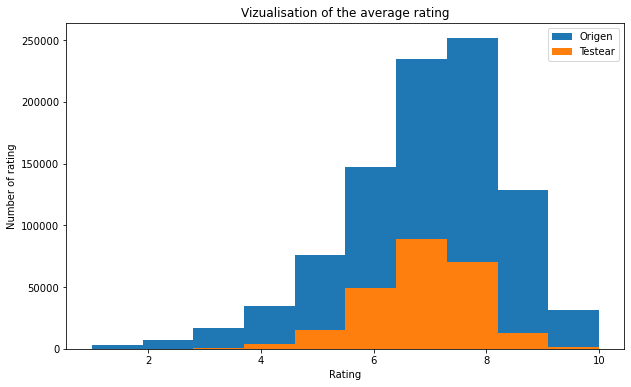

In [59]:
salida2['averageRating'] = [round(nombre, 2) for nombre in salida2['averageRating']]
plt.figure(figsize=(10, 6))
plt.title('Vizualisation of the average rating')
plt.xlabel('Rating')
plt.ylabel('Number of rating')
plt.hist(origen['averageRating'], label='Origen')
plt.hist(salida2['averageRating'], label='Testear')
plt.legend()
plt.show()

The benefits of Random Forest Regressor and why we choose it :

Robustness to noisy data: Random forests are relatively robust to noisy data and outliers. They can work well even if our dataset contains noise or errors. Here, even if our dataset has been cleaned, it's still a good idea to guard against possible errors. 

Handling large numbers of features: Our dataset contains a large number of features, and a random forest model is often efficient without requiring much pre-processing.

Ability to capture non-linear relationships: Random forests are able to model complex, non-linear relationships between features and the target variable, which can be crucial for certain data analysis tasks.

Reduced overfitting: They have a lower tendency to overfit than a single decision tree. By using multiple trees and averaging their predictions, random forests reduce the risk of overfitting.

Ability to handle missing data : Random forests can naturally handle missing data without requiring much pre-processing, which may correspond to our testear dataset.

Generally high performance: In general, random forests offer good predictive performance in a variety of domains without requiring fine-tuning of hyperparameters.

Computation time: Some models, such as complex neural networks or deep learning methods, can require significant computational resources. Since computation time is a constraint in our case (low-performance computer, short deadline), RandomForestRegressor was a good solution.

Dependence on hyperparameters: RandomForestRegressor is not very dependent on the setting of hyperparameters, unlike other methods such as Support Vector Machines (SVM). This dependency requires numerous tests to adjust the parameters, which is both resource-intensive and time-consuming.
